Import Statements

In [88]:
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

def filter_countries(df, iso_column, iso_values):
    # Create an empty DataFrame with the same columns as 'df'
    filtered_df = pd.DataFrame(columns=df.columns)

    # Iterate over the rows of the DataFrame
    for index, row in df.iterrows():
        # Get the ISO value from the current row
        iso = row[iso_column]

        # Check if the ISO value is in the specified list of ISO values
        if iso in iso_values:
            # Append the row to the filtered DataFrame
            filtered_df = pd.concat([filtered_df, row.to_frame().T])

    # Reset the index of the filtered DataFrame
    filtered_df.reset_index(drop=True, inplace=True)

    # Return the filtered DataFrame
    return filtered_df


def uniqueCountries(df):
    list = df['country'].unique().tolist()

    return list

def comparingDataFrames(df1, df2, country_column):
    # Get unique countries from each dataframe
    countries_df1 = set(df1[country_column].unique())
    countries_df2 = set(df2[country_column].unique())

    # Find countries present in df2 but missing in df1
    missing_in_df1 = list(countries_df2 - countries_df1)

    return missing_in_df1

def testIndex(*dataframes):
    for df in dataframes:
        df['index'] = df.groupby('country').ngroup()
        df.set_index('index', inplace=True)
        df.sort_index(inplace=True)

KaggleApi Settings

In [67]:
api = KaggleApi()
api.authenticate()

Import Datasets with Kaggle.API

In [68]:
api.dataset_download_file('thedevastator/global-fossil-co2-emissions-by-country-2002-2022',
                          file_name='GCB2022v27_MtCO2_flat.csv')
with zipfile.ZipFile('GCB2022v27_MtCO2_flat.csv.zip', 'r') as zipref:
    zipref.extractall()

In [69]:
api.dataset_download_file('russellyates88/suicide-rates-overview-1985-to-2016',
                          file_name='master.csv')
with zipfile.ZipFile('master.csv.zip', 'r') as zipref:
    zipref.extractall()

In [70]:
api.dataset_download_file('yapwh1208/countries-gdp-2012-to-2021', file_name='GDP.csv')

False

In [71]:
api.dataset_download_file('folaraz/world-countries-and-continents-details',
                          file_name='Countries Longitude and Latitude.csv')

False

In [72]:
#list with european countries and their iso codes
df_countries_EUROPE = pd.read_csv(r'Country_ISOCode.csv', delimiter=',')
df_countries_EUROPE.rename(columns={'Country':'country'}, inplace=True)

In [73]:
df_allCountries = pd.read_csv("Countries%20Longitude%20and%20Latitude.csv", sep=",")
#lets see the columns
df_allCountries.columns
#'Unnamed: 0' is not needed lets drop it
df_allCountries = df_allCountries.drop('Unnamed: 0', axis=1)
#change name to country and correct coordinates format, they were wrong 
df_allCountries.rename(columns={'name':'country', 'longitude': 'latitude', 'latitude': 'longitude'}, inplace=True)
#columns order 
column_orderA = ['country', 'latitude', 'longitude']
df_allCountries = df_allCountries.reindex(columns=column_orderA)

#Lets filter european countries and hope for the best
european_df_newDfAllCountries = filter_countries(df_allCountries, 'country', df_countries_EUROPE['country'].values)

#lets see what we are dealing with
uniqueCountries_All = uniqueCountries(european_df_newDfAllCountries)

#compare dataframes 
missingCountries_All = comparingDataFrames(european_df_newDfAllCountries, df_countries_EUROPE, 'country')
# complete table - UK, Bosnia and North Macedonia are missing

new_rowsAll = [
    {'country': 'Bosnia and Herzegovina', 'latitude': 43.9159, 'longitude': 17.6791},
    {'country': 'United Kingdom', 'latitude': 55.3781, 'longitude': -3.4360},
    {'country': 'North Macedonia', 'latitude': 41.6086, 'longitude': 21.7453}
]

new_rows_df = pd.DataFrame(new_rowsAll)

# Append the new rows to the original dataframe
european_df_newDfAllCountries = pd.concat([european_df_newDfAllCountries, new_rows_df], ignore_index=True)

#compare again
missingCountries_All2 = comparingDataFrames(european_df_newDfAllCountries, df_countries_EUROPE, 'country')

#see again what is going on -> ideal result, only Kosovo is missing
uniqueCountries_All2 = uniqueCountries(european_df_newDfAllCountries)


In [74]:
df_emissions = pd.read_csv("GCB2022v27_MtCO2_flat.csv", sep=",")

new_df_emissions = df_emissions[(df_emissions['Year'] >= 2006) & (df_emissions['Year'] <= 2016)]
new_df_emissions.rename(columns={'Year':'year', 'Country':'country', 'Total':'Total amount of CO2'}, inplace=True)
new_df_emissions = new_df_emissions.drop(['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita'], axis=1)
new_df_emissions

european_df_newDfEmission = filter_countries(new_df_emissions, 'ISO 3166-1 alpha-3', df_countries_EUROPE['ISO Code'].values)
print(european_df_newDfEmission)

uniqueCountries1 = uniqueCountries(european_df_newDfEmission)

#find out which countries are missing -> Result: All good,those are countries we agreed upon
missingCountries1 = comparingDataFrames(european_df_newDfEmission, df_countries_EUROPE, 'country')



            country ISO 3166-1 alpha-3  year Total amount of CO2
0           Albania                ALB  2006            3.910715
1           Albania                ALB  2007             3.94897
2           Albania                ALB  2008            4.397043
3           Albania                ALB  2009            4.406552
4           Albania                ALB  2010            4.783865
..              ...                ...   ...                 ...
468  United Kingdom                GBR  2012          487.476776
469  United Kingdom                GBR  2013          477.611268
470  United Kingdom                GBR  2014          438.807081
471  United Kingdom                GBR  2015          422.460794
472  United Kingdom                GBR  2016          399.430131

[473 rows x 4 columns]


/var/folders/xv/m8qj2dh50mqf5mb38h6d9kyh0000gn/T/ipykernel_95785/1938260955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_emissions.rename(columns={'Year':'year', 'Country':'country', 'Total':'Total amount of CO2'}, inplace=True)


In [75]:
df_suicide = pd.read_csv("master.csv", sep=",")

new_df_suicide = df_suicide[(df_suicide['year'] >= 2006) & (df_suicide['year'] <= 2016)]
# Group the dataframe by 'country' and 'year' and calculate the sum of 'suicides_no'
new_df_suicide = new_df_suicide.groupby(['country', 'year'])['suicides_no'].sum(). reset_index()
#new_df_suicide = new_df_suicide.drop(['HDI for year', 'gdp_per_capita ($)'], axis=1) -not necessary the last line was missing ['suicides_no']

new_df_suicide
#with the information i could gain through my missingCountries List, I can change the names
new_df_suicide['country'] = new_df_suicide['country'].replace('Russian Federation', 'Russia')


european_df_newDfSuicide = filter_countries(new_df_suicide, 'country', df_countries_EUROPE['country'].values)
print(european_df_newDfSuicide)


uniqueCountries2 = uniqueCountries(european_df_newDfSuicide)

#find out which countries are missing on my newDfSuicide dataframe compared with to the emissions
missingCountries2 = comparingDataFrames(european_df_newDfSuicide, european_df_newDfEmission, 'country')
#compare to our european dataframe
missingCountries3 = comparingDataFrames(european_df_newDfSuicide, df_countries_EUROPE, 'country')




            country  year suicides_no
0           Albania  2006           0
1           Albania  2007         124
2           Albania  2008         160
3           Albania  2009           0
4           Albania  2010          96
..              ...   ...         ...
360  United Kingdom  2011        4393
361  United Kingdom  2012        4444
362  United Kingdom  2013        4824
363  United Kingdom  2014        4788
364  United Kingdom  2015        4910

[365 rows x 3 columns]


In [76]:
df_gdp = pd.read_csv("GDP.csv", sep=",")

new_df_gdp = df_gdp[['Country Name', 'Country Code', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']]
new_df_gdp = new_df_gdp.melt(id_vars=["Country Name", "Country Code"], var_name="year")
new_df_gdp['year'] = new_df_gdp['year'].astype('int64')
new_df_gdp.rename(columns={'Country Name':'country', 'Country Code': 'ISO 3166-1 alpha-3', 'value':'GDP_Value'}, inplace=True)

#with the results from the missingCountries4 let me change the names of the countries and see how many are missing afterwards
new_df_gdp['country'] = new_df_gdp['country'].replace('Turkiye', 'Turkey')
new_df_gdp['country'] = new_df_gdp['country'].replace('Czechia', 'Czech Republic')
new_df_gdp['country'] = new_df_gdp['country'].replace('Russian Federation', 'Russia')
new_df_gdp['country'] = new_df_gdp['country'].replace('Slovak Republic', 'Slovakia')

#filter european coutnries
european_df_newDfGdp = filter_countries(new_df_gdp, 'ISO 3166-1 alpha-3', df_countries_EUROPE['ISO Code'].values)

uniqueCountries3 = uniqueCountries(european_df_newDfGdp)

#if I compare countries we see that some names are written differently -> Changed names and now there are just 3 countries missing. Those countries are not needed as decided.
missingCountries4 = comparingDataFrames(european_df_newDfEmission, european_df_newDfGdp, 'country')

#comparing on iso - same results as by name
missingCountries5 = comparingDataFrames(european_df_newDfEmission, european_df_newDfGdp, 'ISO 3166-1 alpha-3')

#lets see which countries are missing comparing with european df -> ideal Result, countries were agreed upon
missingCountries6 = comparingDataFrames(european_df_newDfGdp, df_countries_EUROPE, 'country')



In [77]:
# same process for gdp and suicide -> Result as expected Suicide DF does not have data the same amount of countries
missingCountries7 = comparingDataFrames(european_df_newDfSuicide, european_df_newDfGdp, 'country')


kombinieren


In [93]:
#when you merge two dataframes on a common column (e.g., 'country'), by default, the merge will only include the rows where the value in the 'country' column is present in both dataframes
merged_df_emissions_suicide = pd.merge(new_df_emissions, european_df_newDfSuicide, on=['country', 'year'])
merged_df_emissions_suicide['suicides_no'] = merged_df_emissions_suicide['suicides_no'].astype('float64')
#as expected suicide dataframe only has 39 countries
uniqueCountries_mergedEmSu = uniqueCountries(merged_df_emissions_suicide)
#lets add the latitude and longitude 
merged_df_emissions_suicide = pd.merge(merged_df_emissions_suicide, european_df_newDfAllCountries, on=['country'])



In [79]:
#merge on country and Year -> 43 countries expected
merged_df_gdp_emissions = pd.merge(european_df_newDfGdp, european_df_newDfEmission, on=['country', 'year'])

#clean new dataframe
merged_df_gdp_emissions = merged_df_gdp_emissions.drop(['ISO 3166-1 alpha-3_y'], axis=1)

#as expected suicide dataframe only has 43 countries
uniqueCountries_mergedGdpEm = uniqueCountries(merged_df_gdp_emissions)

#lets add the latitude and longitude 
merged_df_gdp_emissions = pd.merge(merged_df_gdp_emissions , european_df_newDfAllCountries, on=['country'])



In [80]:
#merge on country and year, I expect 39 countries
merged_df_gdp_suicide = pd.merge(european_df_newDfGdp, european_df_newDfSuicide, on=['country', 'year'])

#as expected suicide dataframe only has 39 countries
uniqueCountries_mergedGdpSu = uniqueCountries(merged_df_gdp_suicide)

#lets add the latitude and longitude 
merged_df_gdp_suicide = pd.merge(merged_df_gdp_suicide , european_df_newDfAllCountries, on=['country'])

In [81]:
# one index per country 
merged_df_emissions_suicideTest = merged_df_emissions_suicide
merged_df_gdp_emissionsTest = merged_df_gdp_emissions
merged_df_gdp_suicideTest = merged_df_gdp_suicide

"""
maybe this will be needed maybe not 

testIndex(merged_df_emissions_suicideTest, merged_df_gdp_emissionsTest, merged_df_gdp_suicideTest )

To retrieve all the positions in a DataFrame that have a specific index value, you can use the `loc` accessor with a boolean condition. Here's an example:

```python
positions_with_index_3 = merged_df_gdp_suicideTest.loc[merged_df_gdp_suicideTest.index == 3]
```

In the code above, `merged_df_gdp_suicideTest.index == 3` creates a boolean condition that checks if the index value is equal to 3. The `loc` accessor is then used to filter the DataFrame based on this condition, resulting in a new DataFrame `positions_with_index_3` that contains all the positions with the index value of 3.

You can access and manipulate the desired positions from the `positions_with_index_3` DataFrame as needed.

I hope this helps! Let me know if you have any further questions.
"""

"\nmaybe this will be needed maybe not \n\ntestIndex(merged_df_emissions_suicideTest, merged_df_gdp_emissionsTest, merged_df_gdp_suicideTest )\n\nTo retrieve all the positions in a DataFrame that have a specific index value, you can use the `loc` accessor with a boolean condition. Here's an example:\n\n```python\npositions_with_index_3 = merged_df_gdp_suicideTest.loc[merged_df_gdp_suicideTest.index == 3]\n```\n\nIn the code above, `merged_df_gdp_suicideTest.index == 3` creates a boolean condition that checks if the index value is equal to 3. The `loc` accessor is then used to filter the DataFrame based on this condition, resulting in a new DataFrame `positions_with_index_3` that contains all the positions with the index value of 3.\n\nYou can access and manipulate the desired positions from the `positions_with_index_3` DataFrame as needed.\n\nI hope this helps! Let me know if you have any further questions.\n"

Use of Python built-in data structures (lists, dictionaries, sets, tuples)

In [82]:
#not needed
##merged_df_emissions_suicide = merged_df_emissions_suicide.fillna(0)
##merged_df_emissions_gdp = merged_df_emissions_gdp.fillna(0)
##merged_df_suicide_gdp = merged_df_suicide_gdp.fillna(0)
#df_countries = df_countries.fillna(0)
##df_allCountries = df_allCountries.fillna(0)

Use of tables, vizualizations/graphics for data exploration

Integration of a statistical analyses (correlation analysis, statical tests)

In [101]:
# Ein leeres DataFrame für die Korrelationskoeffizienten erstellen
correlation_data = pd.DataFrame(columns=["Country", "Correlation"])

# Für jedes Land die Korrelation berechnen
for country in merged_df_emissions_suicide["country"].unique():
    country_data = merged_df_emissions_suicide[merged_df_emissions_suicide["country"] == country]
    correlation = country_data["suicides_no"].corr(country_data["Total amount of CO2"])
    correlation_data = pd.concat([correlation_data, pd.DataFrame({"Country": [country], "Correlation": [correlation]})])

# Ergebnisse anzeigen
print(correlation_data)

                  Country  Correlation
0                 Albania     0.211576
0                 Austria     0.133597
0                 Belarus    -0.724589
0                 Belgium     0.007973
0  Bosnia and Herzegovina    -1.000000
0                Bulgaria     0.611975
0                 Croatia     0.711174
0          Czech Republic    -0.254748
0                 Denmark     0.084046
0                 Estonia    -0.225621
0                 Finland     0.848247
0                  France     0.733583
0                 Georgia     0.528364
0                 Germany    -0.488634
0                  Greece    -0.924426
0                 Hungary     0.719151
0                 Iceland     0.193300
0                 Ireland    -0.537709
0                   Italy    -0.782563
0                  Latvia     0.492274
0               Lithuania     0.273247
0              Luxembourg     0.021338
0                   Malta    -0.497704
0              Montenegro     0.192166
0             Netherlands

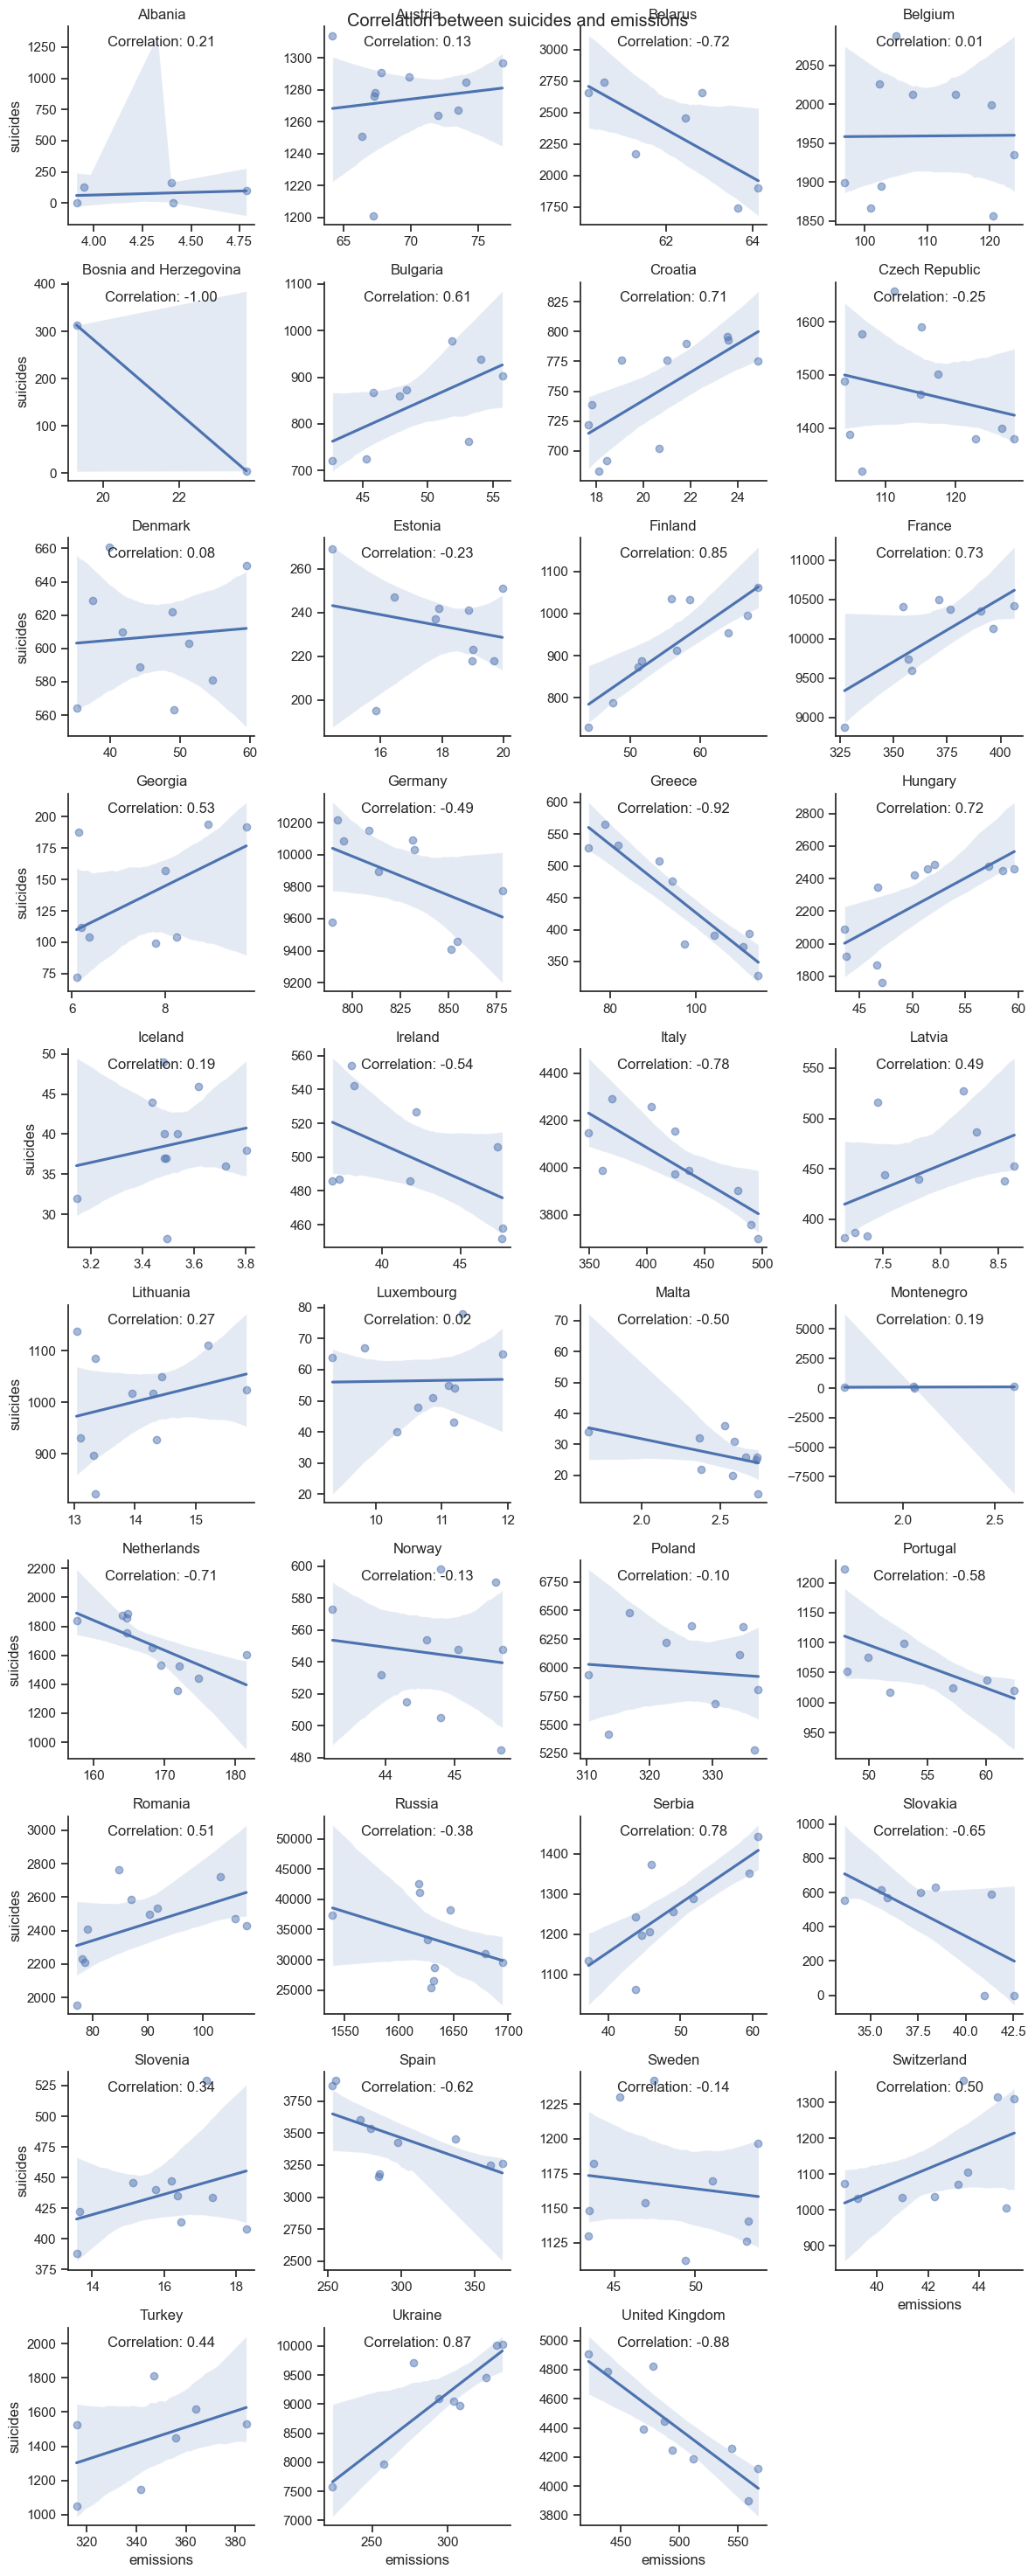

In [119]:
# Q-Q-Plot für jedes Land erstellen
g = sns.FacetGrid(merged_df_emissions_suicide, col="country", col_wrap=4, sharex=False, sharey=False)
g.map(sns.regplot, "Total amount of CO2", "suicides_no", scatter_kws={"alpha": 0.5})
g.set_titles("{col_name}")
g.set_xlabels("emissions")
g.set_ylabels("suicides")

# Korrelationskoeffizienten anzeigen
for ax, country in zip(g.axes.flat, merged_df_emissions_suicide["country"].unique()):
    correlation = correlation_data.loc[correlation_data["Country"] == country, "Correlation"].values[0]
    ax.text(0.5, 0.9, f"Correlation: {correlation:.2f}", transform=ax.transAxes, ha="center")

#output
plt.suptitle("Correlation between suicides and emissions")
plt.tight_layout()
plt.show()

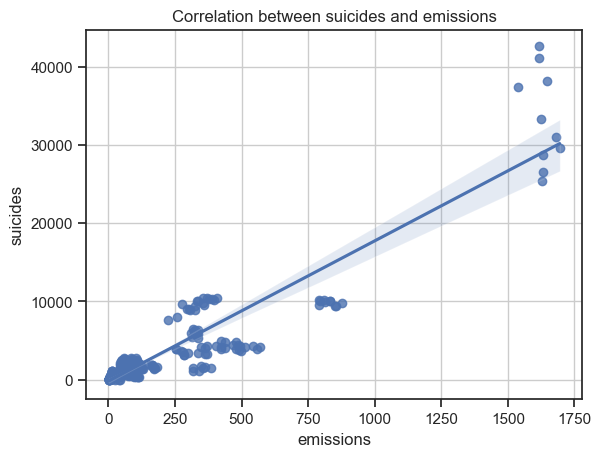

TypeError: regplot() takes from 0 to 1 positional arguments but 3 were given

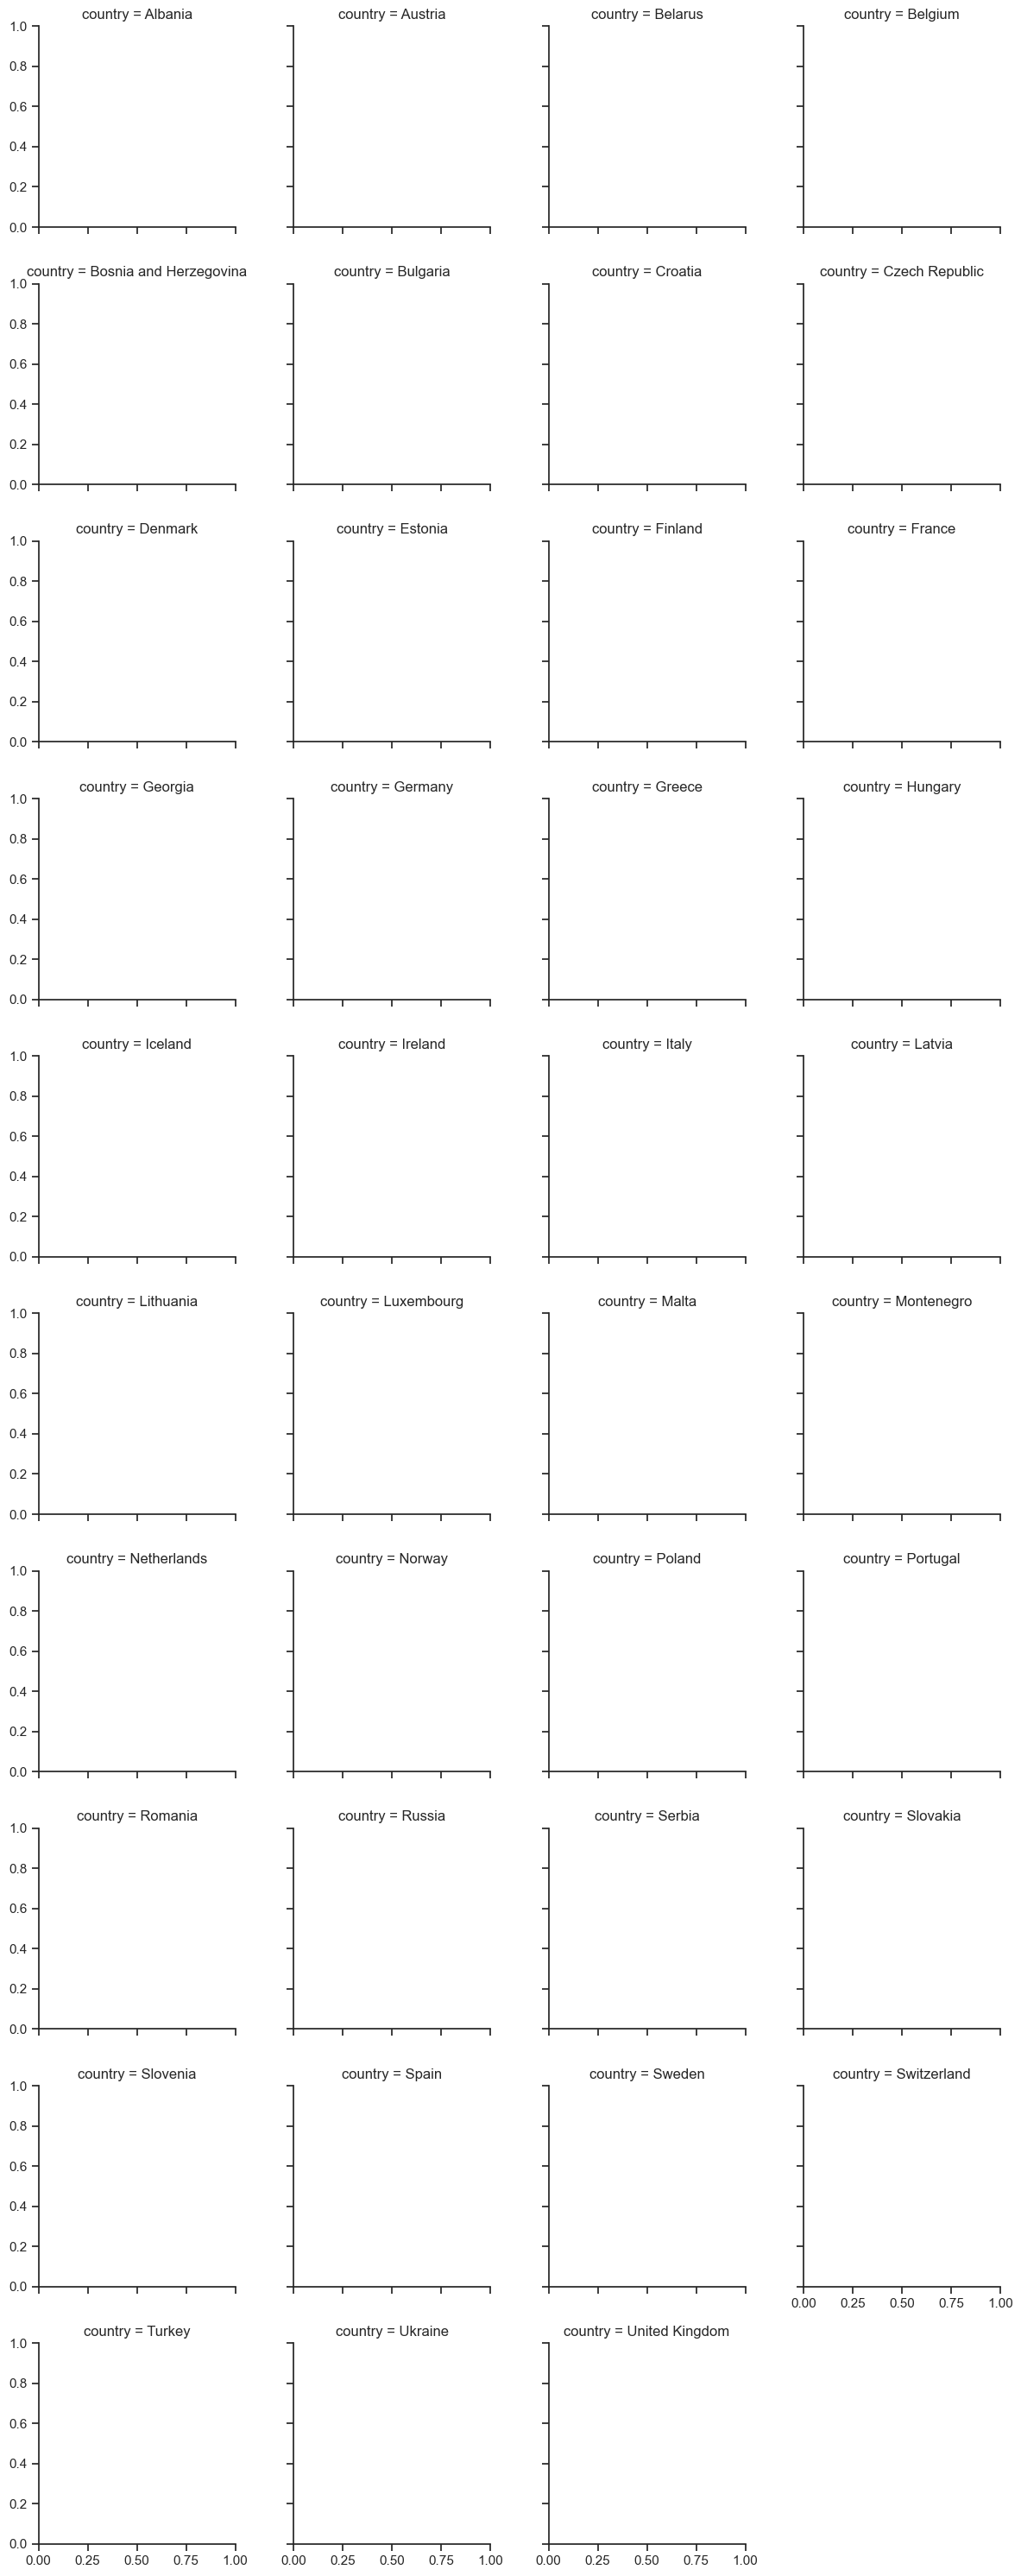

In [110]:
#create q-q-plot
sns.set(style="ticks")
sns.regplot(x='Total amount of CO2', y='suicides_no', data=merged_df_emissions_suicide)
plt.grid(True) 
plt.title('Correlation between suicides and emissions') 
plt.xlabel('emissions') 
plt.ylabel('suicides') 
plt.show()

sns.FacetGrid(merged_df_emissions_suicide, col="country", col_wrap=4)
sns.regplot(sns.regplot, "Total amount of CO2", "suicides_no")
plt.title('Correlation between suicides and emissions') 
plt.xlabel('emissions') 
plt.ylabel('suicides') 
plt.suptitle("Correlation between suicides and emissions")
plt.tight_layout()
plt.show()

Save final Files 

In [ ]:
merged_df_gdp_emissions.to_csv(r'final_csv/merged_df_gdp_emissions.csv', index=False, header=True)
merged_df_gdp_suicide.to_csv(r'final_csv/merged_df_gdp_suicide.csv', index=False, header=True)
merged_df_emissions_suicide.to_csv(r'final_csv/merged_df_emissions_suicide.csv', index=False, header=True)

Remove all non-used files

In [ ]:
os.remove("master.csv")
os.remove("master.csv.zip")
os.remove("GDP.csv")
os.remove("GCB2022v27_MtCO2_flat.csv.zip")
os.remove("GCB2022v27_MtCO2_flat.csv")